# Step Forward Cross Validation for Bioactivity Prediction

## Get the summary of properties as a table and to plot the distributions.

In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joypy import joyplot
from scipy.stats import skew, kurtosis

In [2]:
properties = ["LogD", "LogP", "MCE18"]
summary_list = []

# Loop through CSV files (each file corresponds to a target)
for fname in os.listdir('../benchmark/data/processed'):
    if fname.endswith(".csv"):
        # Extract target name from filename (removing ".csv")
        target_name = os.path.splitext(fname)[0]

        # Read CSV
        df = pd.read_csv(f'../benchmark/data/processed/{fname}')

        # Ensure necessary columns exist
        stats = {"Target": target_name, "N": len(df)}
        for prop in properties:
            stats[f"{prop}_Mean"] = df[prop].mean()
            stats[f"{prop}_SD"] = df[prop].std()
            stats[f"{prop}_Median"] = df[prop].median()
            stats[f"{prop}_Min"] = df[prop].min()
            stats[f"{prop}_Max"] = df[prop].max()
            stats[f"{prop}_IQR"] = df[prop].quantile(0.75) - df[prop].quantile(0.25)
            stats[f"{prop}_Skewness"] = skew(df[prop], nan_policy='omit')
            stats[f"{prop}_Kurtosis"] = kurtosis(df[prop], nan_policy='omit')

            # Append to the summary list
            summary_list.append(stats)

In [3]:
# Create summary DataFrame
summary_df = pd.DataFrame(summary_list)
summary_df

,Target,N,LogD_Mean,LogD_SD,LogD_Median,LogD_Min,LogD_Max,LogD_IQR,LogD_Skewness,LogD_Kurtosis,...,LogP_Skewness,LogP_Kurtosis,MCE18_Mean,MCE18_SD,MCE18_Median,MCE18_Min,MCE18_Max,MCE18_IQR,MCE18_Skewness,MCE18_Kurtosis
0,target_CHEMBL220-1.IC50,1200,3.205618,1.601192,3.112098,-1.283822,9.419002,1.829161,0.232408,0.668510,...,0.701168,1.632161,140.923415,132.746636,101.687371,0.000000,946.949153,93.541261,2.771191,9.482759
1,target_CHEMBL220-1.IC50,1200,3.205618,1.601192,3.112098,-1.283822,9.419002,1.829161,0.232408,0.668510,...,0.701168,1.632161,140.923415,132.746636,101.687371,0.000000,946.949153,93.541261,2.771191,9.482759
2,target_CHEMBL220-1.IC50,1200,3.205618,1.601192,3.112098,-1.283822,9.419002,1.829161,0.232408,0.668510,...,0.701168,1.632161,140.923415,132.746636,101.687371,0.000000,946.949153,93.541261,2.771191,9.482759
3,target_CHEMBL3130-1.IC50,938,2.050180,1.224547,2.096169,-6.943015,5.849337,1.768261,-0.387789,2.550378,...,-0.179047,0.528683,157.246019,68.466980,161.173588,23.911111,386.890909,106.943562,0.231862,-0.617973
4,target_CHEMBL3130-1.IC50,938,2.050180,1.224547,2.096169,-6.943015,5.849337,1.768261,-0.387789,2.550378,...,-0.179047,0.528683,157.246019,68.466980,161.173588,23.911111,386.890909,106.943562,0.231862,-0.617973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,target_CHEMBL222-2.IC50,194,1.621334,0.702413,1.533444,0.102987,3.473901,1.035106,0.342023,-0.253171,...,0.186505,-0.820714,67.878538,21.370519,66.361607,30.000000,126.764706,20.817638,0.885443,0.836895
197,target_CHEMBL222-2.IC50,194,1.621334,0.702413,1.533444,0.102987,3.473901,1.035106,0.342023,-0.253171,...,0.186505,-0.820714,67.878538,21.370519,66.361607,30.000000,126.764706,20.817638,0.885443,0.836895
198,target_CHEMBL284-1.IC50,997,0.458131,1.388070,0.603603,-6.014347,4.185495,1.592538,-0.875207,2.087427,...,-0.457580,0.362568,107.036691,51.066759,95.235862,0.000000,325.684211,48.984567,1.084027,2.008081
199,target_CHEMBL284-1.IC50,997,0.458131,1.388070,0.603603,-6.014347,4.185495,1.592538,-0.875207,2.087427,...,-0.457580,0.362568,107.036691,51.066759,95.235862,0.000000,325.684211,48.984567,1.084027,2.008081


In [ ]:
summary_df.to_csv("../benchmark/results/tables/target_property_summary.csv", index=False)

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.boxplot(data=summary_df.melt(id_vars=["Target"], value_vars=["LogD_Mean", "LogP_Mean", "MCE18_Mean"]),
            x="value", y="variable", ax=axes[0, 0])
axes[0, 0].set_title("Boxplot: LogD, LogP, MCE18 Across Targets")
axes[0, 0].set_xlabel("Value")
axes[0, 0].set_ylabel("Property")

sns.violinplot(data=summary_df.melt(id_vars=["Target"], value_vars=["LogD_Mean", "LogP_Mean", "MCE18_Mean"]),
               x="variable", y="value", ax=axes[0, 1])
axes[0, 1].set_title("Violin Plot: Property Distributions")
axes[0, 1].set_xlabel("Property")
axes[0, 1].set_ylabel("Value")

for prop in ["LogD_Mean", "LogP_Mean", "MCE18_Mean"]:
    sns.kdeplot(summary_df[prop], fill=True, label=prop, ax=axes[1, 0])
axes[1, 0].set_title("KDE Density Plot of Properties")
axes[1, 0].legend()

corr_matrix = summary_df[["LogD_Mean", "LogP_Mean", "MCE18_Mean"]].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5, ax=axes[1, 1])
axes[1, 1].set_title("Heatmap: Correlation Between Properties")

plt.tight_layout()
plt.savefig("../benchmark/results/figures/target_mean_properties_distribution_corr.svg")
plt.show()

In [ ]:
sns.pairplot(summary_df[["LogD_Mean", "LogP_Mean", "MCE18_Mean"]], kind="reg")
plt.title("Pairwise Scatter Plots with Regression")

# Adjust layout
plt.tight_layout()
plt.savefig("../benchmark/results/figures/target_mean_properties_pairwise_reg.svg")
plt.show()

In [ ]:
# List to store all dfs
data_list = []

# Read each CSV file (each file represents a target)
for file in os.listdir("../benchmark/data/processed"):
    if file.endswith(".csv"):
        df = pd.read_csv(f"../benchmark/data/processed/{file}")
        df["Target"] = file[:-4]
        data_list.append(df)

# Combine all CSVs into a single DataFrame
df_all = pd.concat(data_list, ignore_index=True)

In [ ]:
# Function to create a joyplot with smaller yticks
def create_joyplot(property_name, cmap):
    ax = joyplot(
        data=df_all,
        by="Target",
        column=property_name,
        figsize=(10, 20),
        overlap=0.7,
        colormap=sns.color_palette(cmap, as_cmap=True)
    )

    # Reduce y-axis tick size
    plt.title(f"{property_name} Across Targets")

    # plt.tight_layout()
    plt.savefig(f"../benchmark/results/figures/joyplot_target_property_{property_name}.svg")
    plt.show()
    plt.close()

In [ ]:
create_joyplot("LogD", "coolwarm")

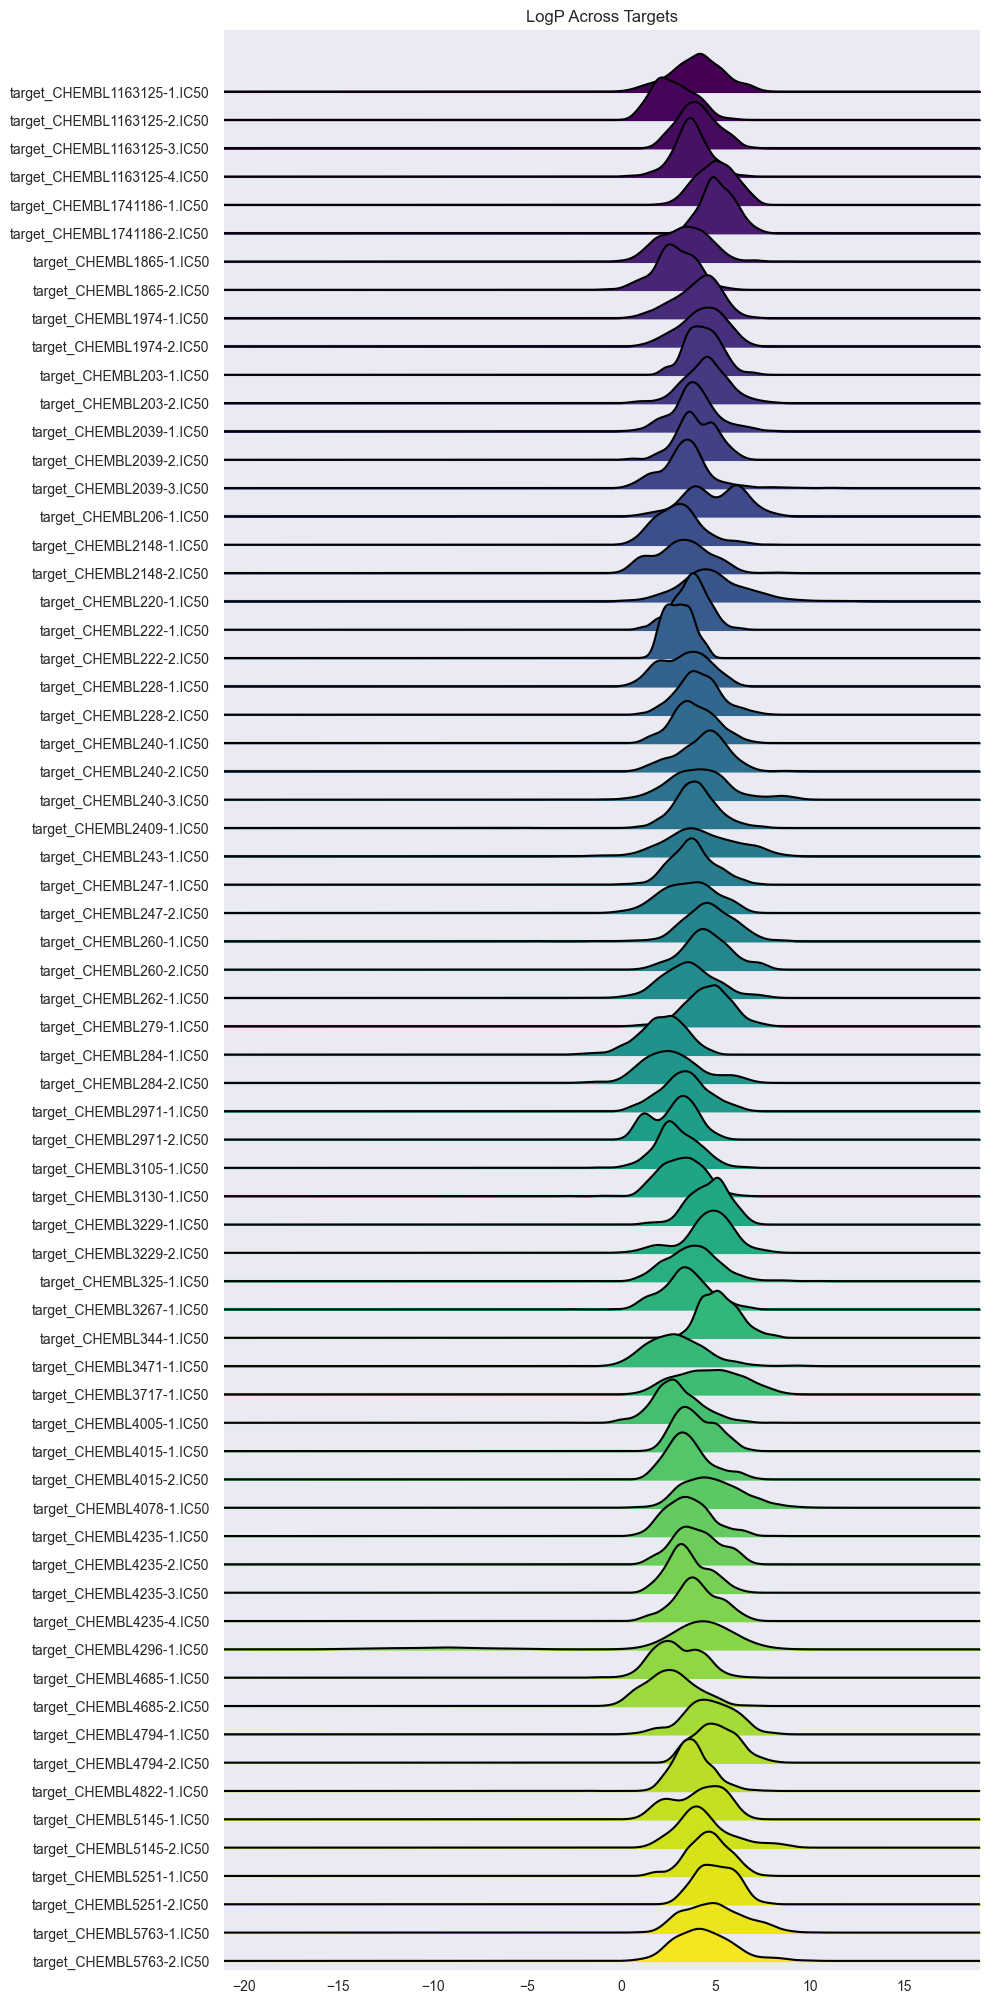

In [10]:
create_joyplot("LogP", "viridis")

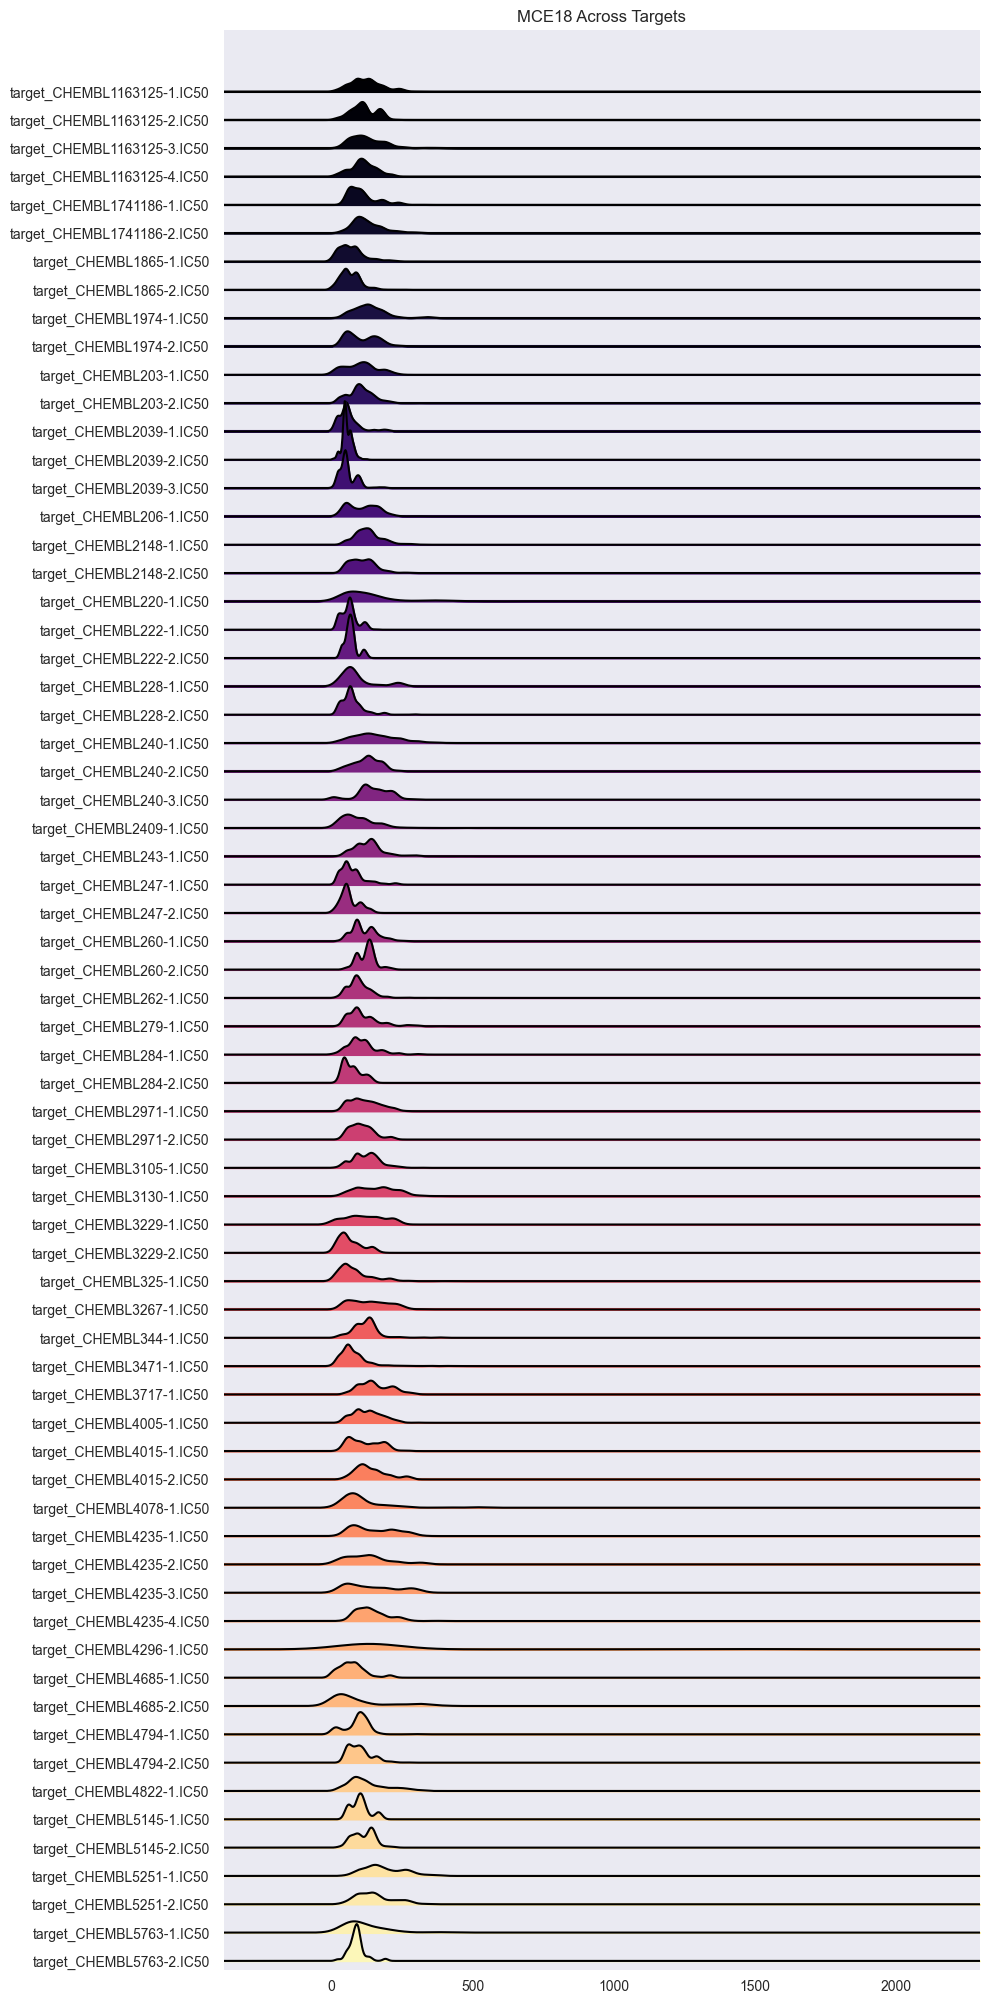

In [11]:
create_joyplot("MCE18", "magma")